In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score,precision_score,roc_curve,roc_auc_score,RocCurveDisplay,f1_score
from commonFns import *
smallestF =  np.finfo('float').eps # smallest float value (numpy), will be used later

In [8]:
path = Path('../data_orig')
# path = Path('ds_cup/orig_data')
orig_train_df = pd.read_csv(path/'train.csv')
orig_valid_df = pd.read_csv(path/'valid.csv')
orig_test_df = pd.read_csv(path/'test.csv')
#Fix Name error:
orig_train_df.rename(columns={'auto_open_ 36_month_num': 'auto_open_36_month_num'},inplace=True)
orig_valid_df.rename(columns={'auto_open_ 36_month_num': 'auto_open_36_month_num'},inplace=True)
orig_test_df.rename(columns={'auto_open_ 36_month_num': 'auto_open_36_month_num'},inplace=True)

In [9]:
def print_size(df, name):
    counts = df['Default_ind'].value_counts()
    print(f'{name} dataset')
    print(f'Num 0 values = {counts[0]}')
    print(f'Num 1 values = {counts[1]}')
    print()
print_size(orig_train_df, 'train')
print_size(orig_valid_df, 'valid')
print_size(orig_test_df, 'test')

train dataset
Num 0 values = 18414
Num 1 values = 1586

valid dataset
Num 0 values = 2778
Num 1 values = 222

test dataset
Num 0 values = 4599
Num 1 values = 401



In [10]:
print(orig_train_df.isnull().sum())
print('--')
print(orig_valid_df.isnull().sum())
print('--')
print(orig_test_df.isnull().sum())
print('--')

tot_credit_debt                          0
avg_card_debt                            0
credit_age                               0
credit_good_age                          0
card_age                                 0
non_mtg_acc_past_due_12_months_num       0
non_mtg_acc_past_due_6_months_num        0
mortgages_past_due_6_months_num          0
credit_past_due_amount                   0
inq_12_month_num                         0
card_inq_24_month_num                    0
card_open_36_month_num                   0
auto_open_36_month_num                   0
uti_card                                 0
uti_50plus_pct                           0
uti_max_credit_line                      0
uti_card_50plus_pct                   2055
ind_acc_XYZ                              0
rep_income                            1570
States                                   0
Default_ind                              0
dtype: int64
--
tot_credit_debt                         0
avg_card_debt                          

In [11]:
df_train = removenulls(orig_train_df)
df_valid = removenulls(orig_valid_df)
df_test = removenulls(orig_test_df)
df_train = oneHotEncodeStates(orig_train_df)
df_valid = oneHotEncodeStates(orig_valid_df)
df_test = oneHotEncodeStates(orig_test_df)

In [12]:
#---Dropping not required columns--
listReqCols = ['non_mtg_acc_past_due_12_months_num','avg_card_debt','uti_card','Default_ind'] 
df_train = dropColsNotInList(df_train,listReqCols)
df_valid = dropColsNotInList(df_valid,listReqCols)
df_test = dropColsNotInList(df_test,listReqCols)
#------------------------------------
df_train = resampleMinority(df_train)

In [13]:
df_train = df_train.sample(frac=1) #Shuffle!
df_trainX = df_train.iloc[:,:-1]
df_trainY = df_train.iloc[:,-1]
#
df_valid = df_valid.sample(frac=1)
df_validX = df_valid.iloc[:,:-1]
df_validY = df_valid.iloc[:,-1]
#
df_test = df_test.sample(frac=1)
df_testX = df_test.iloc[:,:-1]
df_testY = df_test.iloc[:,-1]

In [15]:
model = make_pipeline(StandardScaler(),MLPClassifier(solver='lbfgs',max_iter=100 ,alpha=1e-3,hidden_layer_sizes=(4,20,20, 2)))
hist = model.fit(df_trainX,df_trainY)
df_validYPredProba = model.predict_proba(df_validX)
df_validYPred = np.argmax(df_validYPredProba,axis=-1)

C:\Users\NikhilR\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy = 0.7506666666666667
Recall = 0.7792792792792793
Precision = 0.19839449541284404
--------------------------
Confusion Matrix
Predicted     0    1
Actual              
0.0        2079  699
1.0          49  173
--------------------------
F1 Score 0.3162705667276051
Roc Auc Score =  0.847172766719203


{'Accuracy': 0.7506666666666667,
 'Recall': 0.7792792792792793,
 'Precision': 0.19839449541284404,
 'ConfMatrix': Predicted     0    1
 Actual              
 0.0        2079  699
 1.0          49  173,
 'F1': 0.3162705667276051,
 'FPR': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.59971202e-04,
        3.59971202e-04, 7.19942405e-04, 7.19942405e-04, 1.07991361e-03,
        1.07991361e-03, 1.43988481e-03, 1.43988481e-03, 1.79985601e-03,
        1.79985601e-03, 2.15982721e-03, 2.15982721e-03, 3.59971202e-03,
        3.59971202e-03, 3.95968323e-03, 3.95968323e-03, 5.03959683e-03,
        5.03959683e-03, 5.39956803e-03, 5.39956803e-03, 5.75953924e-03,
        5.75953924e-03, 6.11951044e-03, 6.11951044e-03, 6.47948164e-03,
        6.47948164e-03, 7.55939525e-03, 7.55939525e-03, 7.91936645e-03,
        7.91936645e-03, 8.27933765e-03, 8.27933765e-03, 8.63930886e-03,
        8.63930886e-03, 8.99928006e-03, 8.99928006e-03, 9.35925126e-03,
        9.35925126e-03, 1.04391649e-02, 1.04

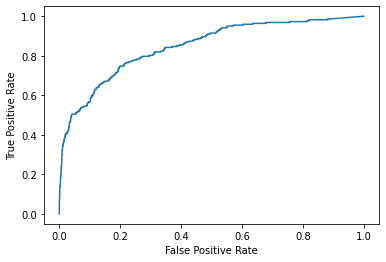

In [16]:
x = getMetrics(df_validY,df_validYPred,df_validYPredProba[:,-1])